# seaborn_Style management
- Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。
- 那么Pandas与Seaborn之间有什么区别呢？
- 其实两者都是使用了matplotlib来作图，但是有非常不同的设计差异
  > - 在只需要简单地作图时直接用Pandas，但要想做出更加吸引人，更丰富的图就可以使用Seaborn
  > - Pandas的作图函数并没有太多的参数来调整图形，所以你必须要深入了解matplotlib
  > - Seaborn的作图函数中提供了大量的参数来调整图形，所以并不需要太深入了解matplotlib
- 官网手册目录（http://seaborn.pydata.org/tutorial.html）
  > - Style management
  > - Plotting functions
  > - Structured grids

- Style management
  > - Controlling figure aesthetics
  >  > - Styling figures with axes_style() and set_style()
  >  > - Removing spines with despine()
  >  > - Temporarily setting figure style
  >  > - Overriding elements of the seaborn styles
  >  > - Scaling plot elements with plotting_context() and set_context()
  > - Choosing color palettes
  >  > - Building color palettes with color_palette()
  >  > - Qualitative color palettes
  >  > - Sequential color palettes
  >  > - Diverging color palettes
  >  > - Changing default palettes with set_palette()

# 一、控制图形外观（Controlling figure aesthetics）

- Seaborn 将matplotlib的参数分为两个独立的部分：
  > - 第一部分设置绘图的外观
  > - 第二部分规范图形的各种元素  
  
- 使用两对函数设置参数：
  > - 风格：axes_style() and set_style()
  > - 规范：plotting_context() and set_context()
  
- Seaborn splits matplotlib parameters into two independent groups. 
  > - The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.
- The interface for manipulating these parameters are two pairs of functions. 
  > - To control the style, use the axes_style() and set_style() functions. 
  > - To scale the plot, use the plotting_context() and set_context() functions. 
  > - In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))

%matplotlib inline

- 定义一个正弦曲线
  > define a simple function to plot some offset sine waves

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

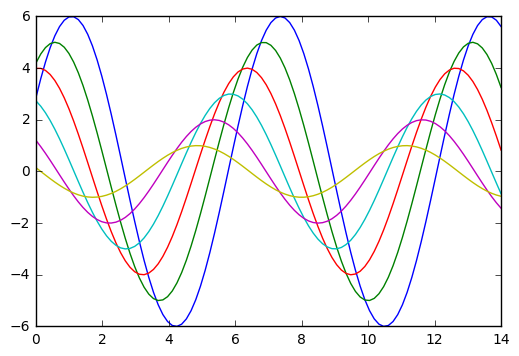

In [3]:
sinplot()

- 导入seaborn包，转换成sns风格

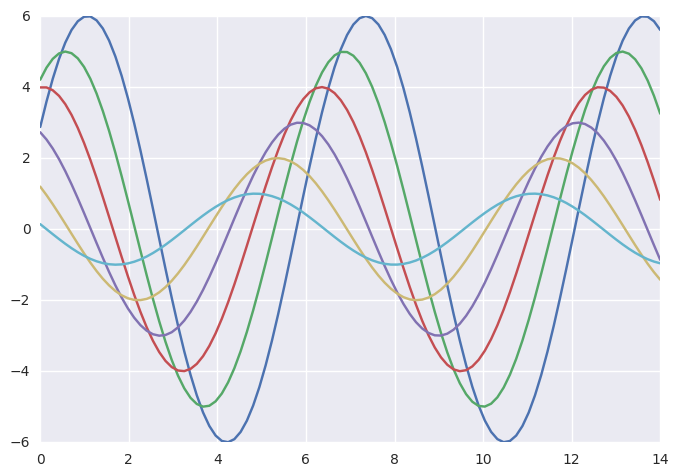

In [4]:
import seaborn as sns
sinplot()

## 1 风格设置（Styling figures with axes_style() and set_style()）
- 五种不同主题的风格：
  > darkgrid（默认）, whitegrid, dark, white, and ticks

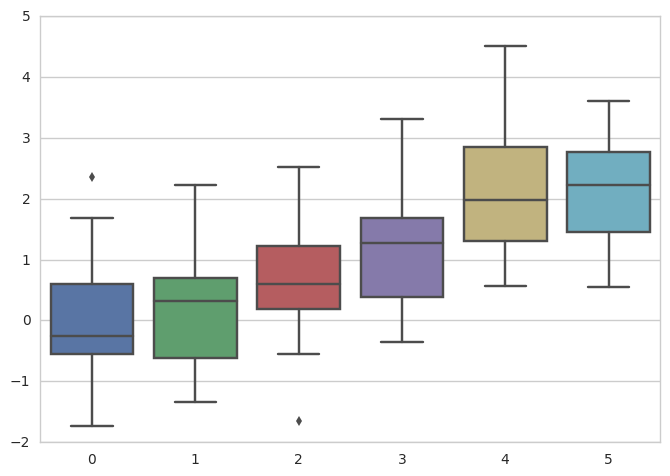

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

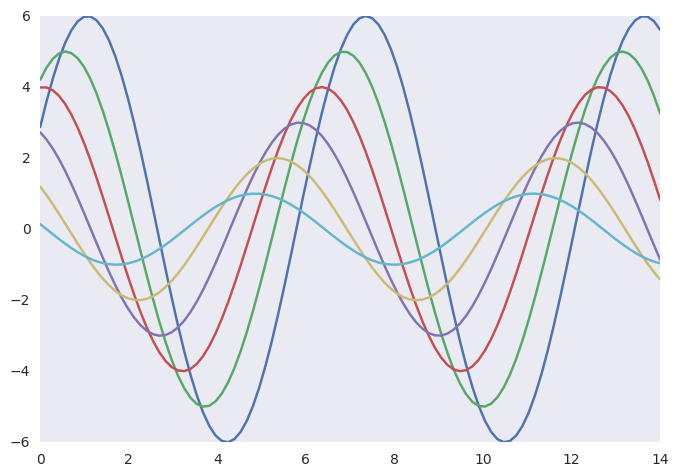

In [6]:
sns.set_style("dark")  # 去除 网格（grid）
sinplot()

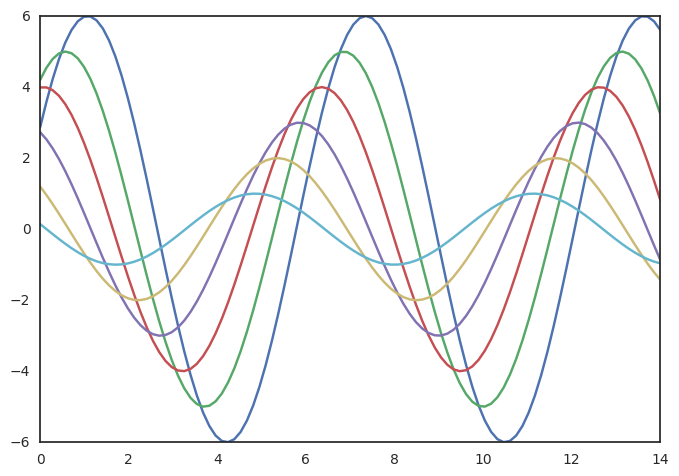

In [7]:
sns.set_style("white")
sinplot()

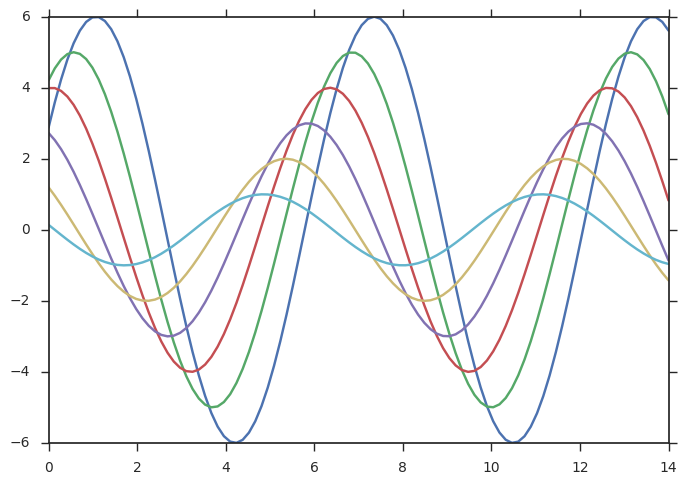

In [8]:
sns.set_style("ticks")
sinplot()

## 2 去除边线（Removing spines with despine()）
- Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. 
- It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

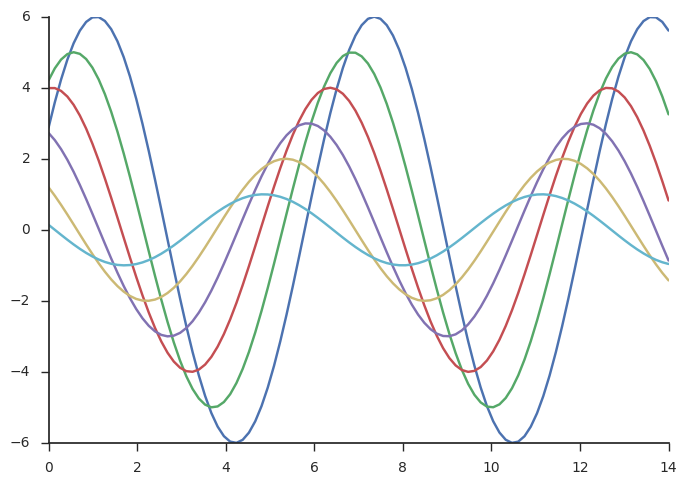

In [9]:
sinplot()
sns.despine()

- trim parameter 能够限制显示边线的范围
  > - Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). 
  > - When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

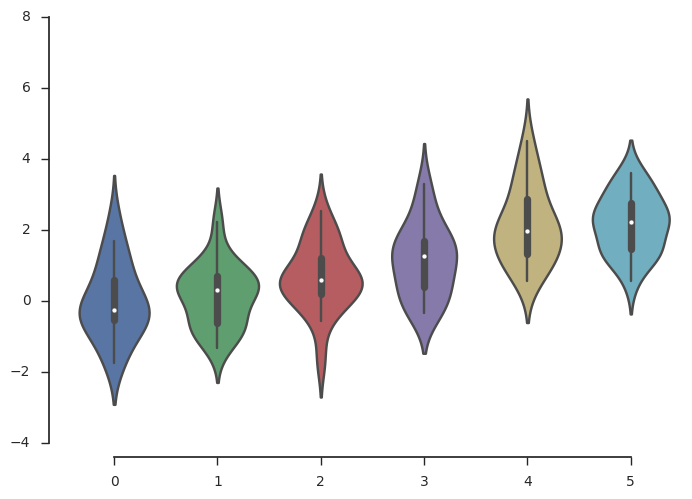

In [10]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

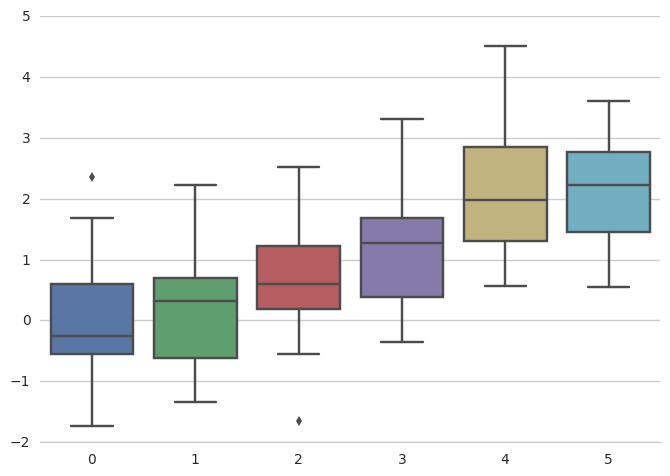

In [11]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True) # 去除左边线

## 3 临时设置图形风格（Temporarily setting figure style）
- Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. 

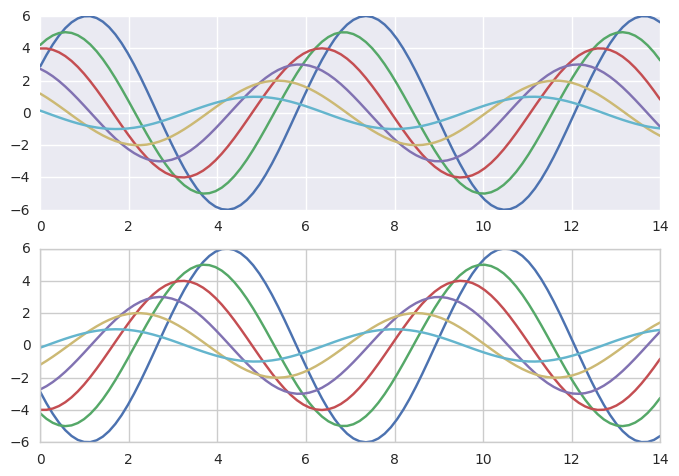

In [12]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

## 4 主要元素（Overriding elements of the seaborn styles）
- 通过使用字典形式的参数设置个人风格的seaborn 风格，但是这种方法只能重置属于风格定义部分的参数
- If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). - -
- Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level set() function takes a dictionary of any matplotlib parameters).

In [13]:
sns.axes_style() # 查看包含的主要元素

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

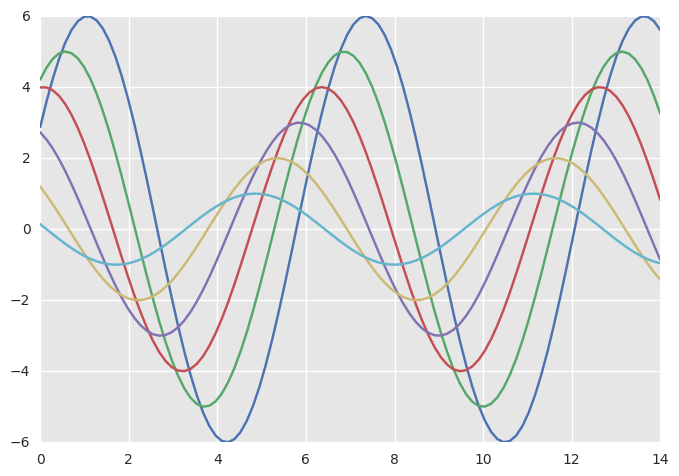

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # set different versions of these parameters
sinplot()

## 5 规范绘图（Scaling plot elements with plotting_context() and set_context()）
- A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

In [ ]:
sns.set() # 重置成默认参数

- 四种背景风格：paper, notebook（默认）, talk, and poster。按大小顺序排列

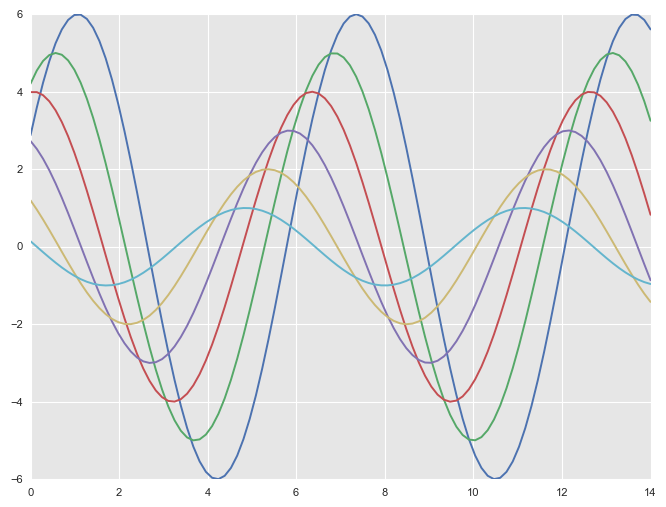

In [15]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

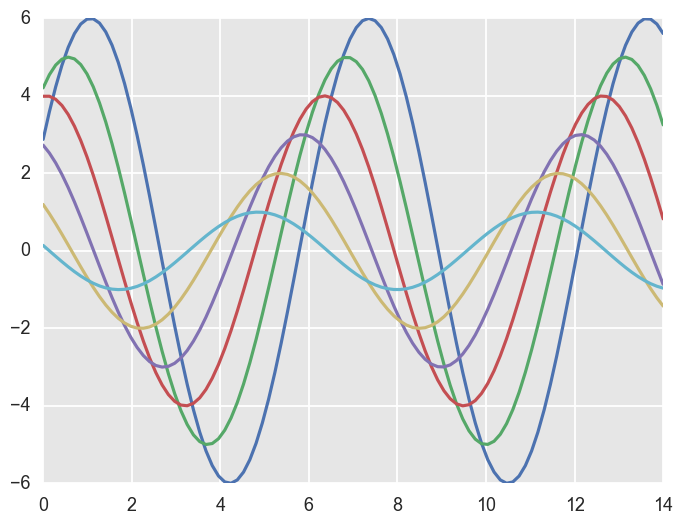

In [16]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

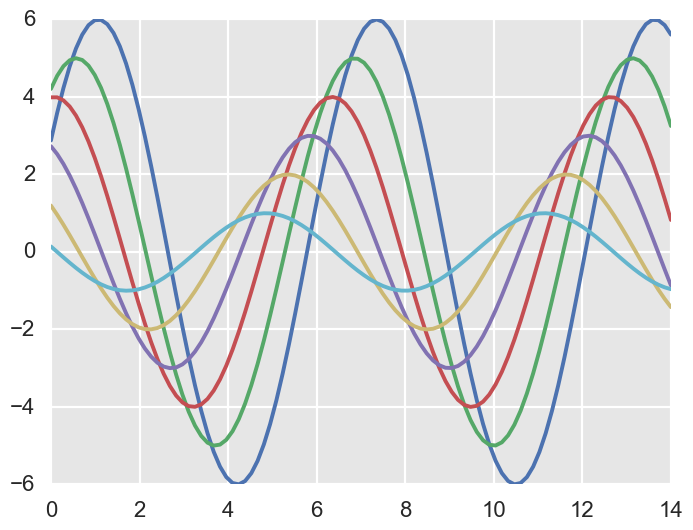

In [17]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

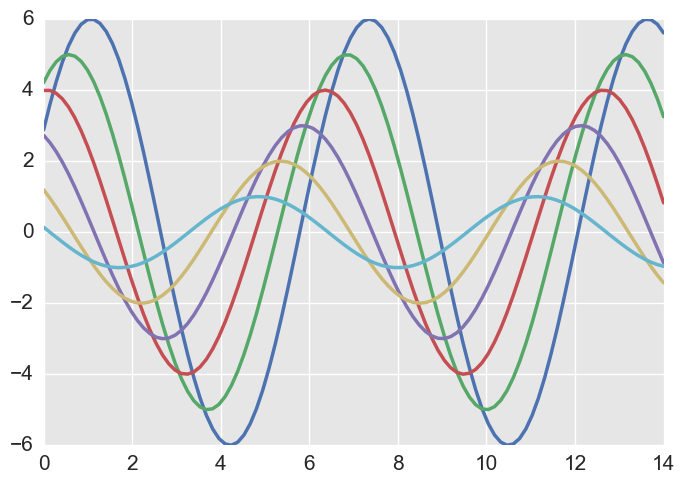

In [18]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5}) # 通过字典形式设置参数
sinplot()